## ⚙️ **Libraries Import**

In [102]:
# Set seed for reproducibility
SEED = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(SEED)
random.seed(SEED)

# Import PyTorch
import torch
torch.manual_seed(SEED)

if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

# Import other libraries
import pandas as pd

PyTorch version: 2.8.0+cpu
Device: cpu


## ⏳ **Data Loading**

In [103]:
df_train = pd.read_csv("pirate_pain_train.csv")
df_test = pd.read_csv("pirate_pain_test.csv")
df_train.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,0,2,1,two,two,two,1.094705,...,3.499558e-06,1.945042e-06,0.000004,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5
1,0,1,2,2,2,2,two,two,two,1.135183,...,3.976952e-07,6.765107e-07,0.000006,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5
2,0,2,2,0,2,2,two,two,two,1.080745,...,1.533820e-07,1.698525e-07,0.000001,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5
3,0,3,2,2,2,2,two,two,two,0.938017,...,1.006865e-05,5.511079e-07,0.000002,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5
4,0,4,2,2,2,2,two,two,two,1.090185,...,4.437266e-06,1.735459e-07,0.000002,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5


In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105760 entries, 0 to 105759
Data columns (total 40 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sample_index   105760 non-null  int64  
 1   time           105760 non-null  int64  
 2   pain_survey_1  105760 non-null  int64  
 3   pain_survey_2  105760 non-null  int64  
 4   pain_survey_3  105760 non-null  int64  
 5   pain_survey_4  105760 non-null  int64  
 6   n_legs         105760 non-null  object 
 7   n_hands        105760 non-null  object 
 8   n_eyes         105760 non-null  object 
 9   joint_00       105760 non-null  float64
 10  joint_01       105760 non-null  float64
 11  joint_02       105760 non-null  float64
 12  joint_03       105760 non-null  float64
 13  joint_04       105760 non-null  float64
 14  joint_05       105760 non-null  float64
 15  joint_06       105760 non-null  float64
 16  joint_07       105760 non-null  float64
 17  joint_08       105760 non-nul

In [105]:
train_labels = pd.read_csv("pirate_pain_train_labels.csv")
train_labels.head()

,sample_index,label
0,0,no_pain
1,1,no_pain
2,2,low_pain
3,3,no_pain
4,4,no_pain


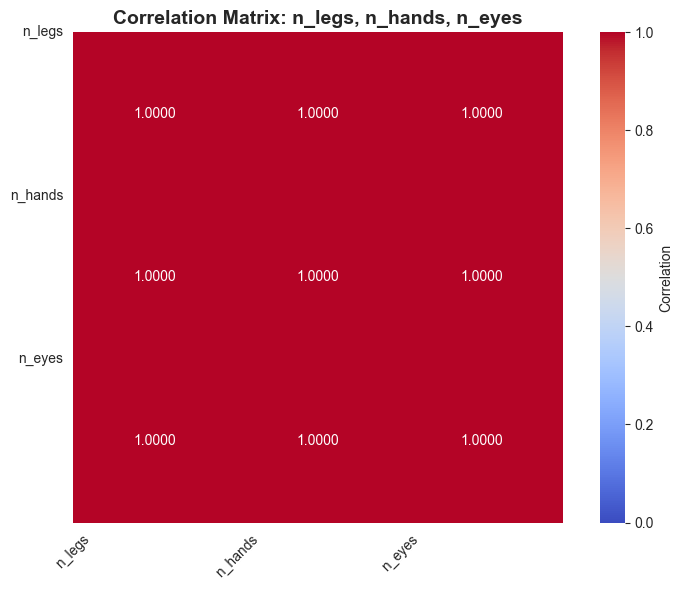

Correlation Matrix:
         n_legs  n_hands  n_eyes
n_legs      1.0      1.0     1.0
n_hands     1.0      1.0     1.0
n_eyes      1.0      1.0     1.0


In [106]:
# Check correlation between n_legs, n_hands, n_eyes
import matplotlib.pyplot as plt
import seaborn as sns

# Create encoded versions for correlation analysis
for col in ['n_legs', 'n_hands', 'n_eyes']:
    df_train[f'{col}_encoded'] = (df_train[col] == 'two').astype(int)
    df_test[f'{col}_encoded'] = (df_test[col] == 'two').astype(int)

# Calculate correlation matrix
correlation_features = ['n_legs_encoded', 'n_hands_encoded', 'n_eyes_encoded']
corr_matrix = df_train[correlation_features].corr()

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.4f', cmap='coolwarm', 
            square=True, vmin=0, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix: n_legs, n_hands, n_eyes', fontsize=14, fontweight='bold')
plt.xticks(range(3), ['n_legs', 'n_hands', 'n_eyes'], rotation=45)
plt.yticks(range(3), ['n_legs', 'n_hands', 'n_eyes'], rotation=0)
plt.tight_layout()
plt.show()

# Print correlation values
print("Correlation Matrix:")
print("=" * 50)
corr_matrix.index = ['n_legs', 'n_hands', 'n_eyes']
corr_matrix.columns = ['n_legs', 'n_hands', 'n_eyes']
print(corr_matrix)

### Result: Perfect correlation (1.0) detected!
These three features are 100% redundant.

In [107]:
# Verify that all three features always have the same value
print("Verifying redundancy...")
print("=" * 60)

# Show unique combinations
print("Unique combinations in the data:")
print("=" * 60)
unique_combos = df_train[['n_legs', 'n_hands', 'n_eyes']].drop_duplicates()
for idx, row in unique_combos.iterrows():
    count = ((df_train['n_legs'] == row['n_legs']) & 
             (df_train['n_hands'] == row['n_hands']) & 
             (df_train['n_eyes'] == row['n_eyes'])).sum()
    print(f"  {row['n_legs']:15s} | {row['n_hands']:15s} | {row['n_eyes']:15s} → {count:,} samples")

print("\nConclusion: Only 2 combinations exist (all natural OR all prosthetic) → Safe to consolidate into a single binary feature!")

Verifying redundancy...
Unique combinations in the data:
  two             | two             | two             → 104,800 samples
  one+peg_leg     | one+hook_hand   | one+eye_patch   → 960 samples

Conclusion: Only 2 combinations exist (all natural OR all prosthetic) → Safe to consolidate into a single binary feature!


In [108]:
# Create binary 'has_prosthetics' feature (0 = all natural, 1 = has prosthetics)
print("Creating consolidated feature: 'has_prosthetics'")
print("=" * 60)

# Create the new feature
df_train['has_prosthetics'] = (df_train['n_legs'] != 'two').astype(int)
df_test['has_prosthetics'] = (df_test['n_legs'] != 'two').astype(int)

# Show the mapping
print("\nMapping:")
print("  has_prosthetics = 0 → All natural body parts (two legs, two hands, two eyes)")
print("  has_prosthetics = 1 → Has prosthetics (peg leg, hook hand, eye patch)")

# Show distribution
print("\n" + "=" * 60)
print("Distribution of new feature:")
print("=" * 60)
print("\nTraining set:")
train_dist = df_train['has_prosthetics'].value_counts().sort_index()
for value, count in train_dist.items():
    label = "Natural" if value == 0 else "Prosthetics"
    pct = (count / len(df_train)) * 100
    print(f"  {value} ({label:12s}): {count:6,} samples ({pct:.2f}%)")

print("\nTest set:")
test_dist = df_test['has_prosthetics'].value_counts().sort_index()
for value, count in test_dist.items():
    label = "Natural" if value == 0 else "Prosthetics"
    pct = (count / len(df_test)) * 100
    print(f"  {value} ({label:12s}): {count:6,} samples ({pct:.2f}%)")


# Columns to drop
cols_to_drop = ['n_legs', 'n_hands', 'n_eyes', 
                'n_legs_encoded', 'n_hands_encoded', 'n_eyes_encoded']

# Drop from both train and test
df_train = df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns])
df_test = df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns])

print("\nFeature created successfully!")

Creating consolidated feature: 'has_prosthetics'

Mapping:
  has_prosthetics = 0 → All natural body parts (two legs, two hands, two eyes)
  has_prosthetics = 1 → Has prosthetics (peg leg, hook hand, eye patch)

Distribution of new feature:

Training set:
  0 (Natural     ): 104,800 samples (99.09%)
  1 (Prosthetics ):    960 samples (0.91%)

Test set:
  0 (Natural     ): 209,760 samples (99.02%)
  1 (Prosthetics ):  2,080 samples (0.98%)

Feature created successfully!
